In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

### 3、作业
【第1题】预测年收入是否大于50K美元
读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [4]:
adult = pd.read_csv('../data/adults.txt')
adult

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data = adult.loc[:, ['race','occupation', 'hours_per_week']].copy()
target = adult.sex.values.copy()

In [9]:
data

,race,occupation,hours_per_week
0,White,Adm-clerical,40
1,White,Exec-managerial,13
2,White,Handlers-cleaners,40
3,Black,Handlers-cleaners,40
4,Black,Prof-specialty,40
...,...,...,...
32556,White,Tech-support,38
32557,White,Machine-op-inspct,40
32558,White,Adm-clerical,40
32559,White,Adm-clerical,20


In [15]:
cols = [ 'race', 'occupation']
for col in cols:
    uni = data[col].unique()
    def convert(item):
        index = np.argwhere(uni==item)[0, 0]
        return index
    data[col] = data[col].map(convert)

In [16]:
data

,race,occupation,hours_per_week
0,0,0,40
1,0,1,13
2,0,2,40
3,1,2,40
4,1,3,40
...,...,...,...
32556,0,10,38
32557,0,9,40
32558,0,0,40
32559,0,0,20


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [24]:
logistic.predict(X_test)

array(['Male', 'Male', 'Male', ..., 'Male', 'Male', 'Male'], dtype=object)

In [25]:
logistic.score(X_test, y_test)

0.6814064179333641

In [26]:
logistic.score(X_train, y_train)

0.6828931203931204

【第2题】从疝气病症预测病马的死亡率

In [33]:
train = pd.read_csv('../data/horseColicTraining.txt', sep='\t', header=None)
train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,0.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,0.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,0.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,0.0,120.0,70.0,4.0,0.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,5.0,55.0,65.0,0.0,0.0,0.0
295,2.0,1.0,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1.0,0.0,4.0,4.0,44.0,0.0,3.0,3.3,0.0
296,1.0,1.0,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,...,2.0,1.0,0.0,3.0,5.0,60.0,6.8,0.0,0.0,0.0
297,1.0,1.0,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,...,3.0,1.0,0.0,4.0,4.0,50.0,6.0,3.0,3.4,1.0


In [35]:
test = pd.read_csv('../data/horseColicTest.txt', sep='\t', header=None)
test 

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,1,0.0,3,5,45.0,70.0,3,2.0,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,1,0.0,0,0,35.0,61.0,3,2.0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,2,37.0,5.8,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2,1,38.6,60,30,1,1,3,1,4,...,1,1,0.0,0,0,40.0,6.0,1,0.0,1
63,2,1,37.8,42,40,1,1,1,1,1,...,0,0,0.0,3,3,36.0,6.2,0,0.0,1
64,1,1,38.0,60,12,1,1,2,1,2,...,1,1,0.0,1,4,44.0,65.0,3,2.0,0
65,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,1,37.0,5.8,0,0.0,1


In [52]:
X_train = train.iloc[:, 0:-1]
y_train = train.iloc[:, -1]

In [53]:
X_test = test.iloc[:, 0:-1]
y_test = test.iloc[:, -1]

In [56]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
logistic.score(X_test, y_test)

0.7164179104477612

In [58]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [61]:
df = DataFrame(data=data, columns=feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.linear_model import Ridge

In [69]:
from sklearn.linear_model import Lasso

In [78]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.6864972452538575

In [84]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6864842611319376

In [85]:
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.6861384709280354

In [ ]:
# 作业: y = θX的写法. 要求大家用y = wx + b写法,使用梯度下降实现线性回归.

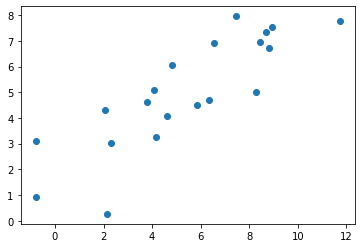

In [110]:
x = np.linspace(0, 10, num=20) + np.random.randn(20)
y = np.linspace(2, 8, num=20) + np.random.randn(20)
plt.scatter(x, y)

In [111]:
X = np.hstack((np.ones(shape=(20, 1)), x.reshape(-1, 1)))
X

array([[ 1.        , -0.78305591],
       [ 1.        ,  2.04720811],
       [ 1.        , -0.78885904],
       [ 1.        ,  2.30612013],
       [ 1.        ,  2.13066585],
       [ 1.        ,  4.14515117],
       [ 1.        ,  4.06029278],
       [ 1.        ,  3.80595645],
       [ 1.        ,  5.8453304 ],
       [ 1.        ,  4.61740835],
       [ 1.        ,  4.83418873],
       [ 1.        ,  6.54784624],
       [ 1.        ,  6.35680168],
       [ 1.        ,  8.82275092],
       [ 1.        ,  7.46745619],
       [ 1.        ,  8.4560709 ],
       [ 1.        ,  8.952498  ],
       [ 1.        ,  8.29718347],
       [ 1.        , 11.74677978],
       [ 1.        ,  8.68486959]])

In [127]:
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

In [112]:
# 定义预测函数
def linear(w, b):
    return w * x + b

In [128]:
def loss(x,y):
    gradient_w = 2*(y - linear(x,b))*(-x)
    gradient_b = 2*(y - linear(x, b))*(-1)
    return gradient_w,gradient_b

In [129]:
# 使用梯度下降去更新theta, 求损失最小的时候的theta
learning_rate = 0.01
max_iter = 2000
i = 0

while True:
        # 更新theta
        y_pred = linear(w, b)
        
        
        gradient_b = (-np.dot((y - y_pred), X)/ 20)[0]
        gradient_w = (-np.dot((y - y_pred), X)/ 20)[1]
    
        w -= gradient_w * learning_rate
        b -= gradient_b * learning_rate
        
        # 退出条件
        i += 1
        if i > max_iter:
            break      
        

In [130]:
w

array([-7.10053091e+13, -1.66589503e+00,  2.04411482e+13, -2.59629860e+00,
       -3.68619652e+00, -4.56308337e+00, -4.02427550e+00, -3.84750473e+00,
       -6.13500000e+00, -4.88980791e+00, -4.72125715e+00, -6.51394176e+00,
       -6.65023579e+00, -9.00539011e+00, -7.38814139e+00, -8.58924982e+00,
       -9.04876688e+00, -8.65068538e+00, -1.19704814e+01, -8.78835492e+00])

In [131]:
b

array([ 5.56011271e+13,  1.08992397e-01, -1.61251846e+13, -2.28410768e+00,
       -4.27536700e+00, -1.39055828e+01, -1.13909036e+01, -9.87519583e+00,
       -2.96447886e+01, -1.72338223e+01, -1.73251039e+01, -3.59371486e+01,
       -3.56947423e+01, -7.11218590e+01, -4.78025052e+01, -6.45612147e+01,
       -7.25864846e+01, -6.38190523e+01, -1.30207923e+02, -6.80931653e+01])

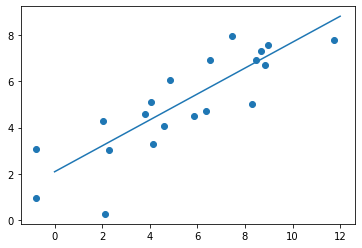

In [120]:
plt.scatter(x, y)
x_test = np.linspace(0, 12, 20)
y_test = 0.5609541828990028 * x_test + 2.089099971929366
plt.plot(x_test, y_test)